In [1]:
from rl4greencrab.envs.simple_env import SimpleEnv
from stable_baselines3 import PPO, TD3
from sb3_contrib import TQC, RecurrentPPO
from stable_baselines3.common.env_util import make_vec_env
from rl4greencrab.envs.green_crab_monthly_env_norm import greenCrabMonthEnvNormalized
from rl4greencrab import evaluate_agent, multiConstAction, simulator
import pandas as pd
import numpy as np
from rl4greencrab import plot_agent
import ray

INFO: Note: detected 128 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
INFO: Note: NumExpr detected 128 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 16.
INFO: NumExpr defaulting to 16 threads.
/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


In [2]:
from rl4greencrab import greenCrabMonthEnvSimple, greenCrabMonthEnvSimpleNormalized, greenCrabMonthEnvSize, greenCrabMonthEnvSizeNormalized

In [3]:
config = {
    "w_mort_scale" : 600,
    "growth_k": 0.70,
    'random_start':True,
    'var_penalty_const': 0
    # "curriculum": True
}

In [4]:
td3Agent = TD3.load(f"../saved_agents/TD3-gcmonthenvsizenorm-1", device="cpu")
ppoAgent = PPO.load(f"../saved_agents/PPO-gcmonthenvsizenorm-1", device="cpu")
tqcAgent = TQC.load(f"../saved_agents/TQC-gcmonthenvsizenorm-1", device="cpu")
recurrentPPOAgent = RecurrentPPO.load("RecurrentPPO_gcmonthenvsizenorm_256_1_{'pi': [256, 256], 'vf': [256, 256]}_False", device="cpu")

In [9]:
evalEnv = greenCrabMonthEnvSizeNormalized(config)

In [11]:
evalEnv =  greenCrabMonthEnvSizeNormalized(config)
ppo_plot_agent = plot_agent(env_sim_df=None, 
                            agent_name='ppo_agent_size_rep500', 
                            env=evalEnv, 
                            agent=ppoAgent, 
                            save_dir='.')
df = ppo_plot_agent.gen_env_sim_df(rep=500, obs_names=['crabs','months'])
ppo_plot_agent.save_df(ppo_plot_agent.env_simulation_df, 'ppo_size_sim_500')

In [12]:
evalEnv = greenCrabMonthEnvSizeNormalized(config)
tqc_plot_agent = plot_agent(env_sim_df=None, 
                            agent_name='tqc_agent_size', 
                            env=evalEnv, 
                            agent=tqcAgent, 
                            save_dir='.')
tqc_plot_agent.gen_env_sim_df(rep=500, obs_names=['crabs','months'])
tqc_plot_agent.save_df(tqc_plot_agent.env_simulation_df, 'tqc_size_sim_500')

In [ ]:
evalEnv =  greenCrabMonthEnvSizeNormalized(config)
rppo_plot_agent = plot_agent(env_sim_df=None, 
                            agent_name='rppo_agent_size_rep500', 
                            env=evalEnv, 
                            agent=recurrentPPOAgent, 
                            save_dir='.')
rppo_plot_agent.gen_env_sim_df(rep=500, obs_names=['crabs','months'])
rppo_plot_agent.save_df(rppo_plot_agent.env_simulation_df, 'rppo_size_sim_500')

In [16]:
evalEnv =  greenCrabMonthEnvSizeNormalized(config)
td3_plot_agent = plot_agent(env_sim_df=None, 
                            agent_name='td3_agent_size_rep500', 
                            env=evalEnv, 
                            agent=td3Agent, 
                            save_dir='.')
td3_plot_agent.gen_env_sim_df(rep=500, obs_names=['crabs','months'])
td3_plot_agent.save_df(td3_plot_agent.env_simulation_df, 'td3_sim_500')

Saved ./tqc_agent_size/crabs_over_time.png


<Figure size 800x400 with 0 Axes>

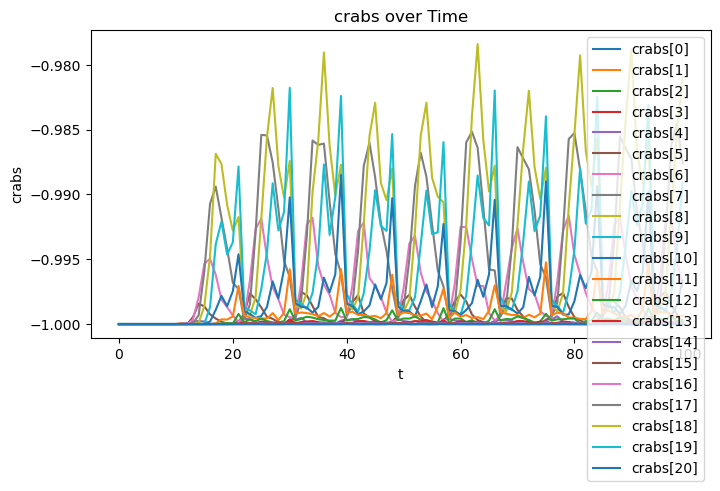

In [7]:
ppo_plot_agent.agent_ob_overtime_plots(obs_name='crabs')

In [17]:
td3AgentSimple = TD3.load(f"../saved_agents/TD3-gcmonthenvsimplenorm-1", device="cpu")
ppoAgentSimple = PPO.load(f"../saved_agents/PPO-gcmonthenvsimplenorm-1", device="cpu")
tqcAgentSimple = TQC.load(f"../saved_agents/TQC-gcmonthenvsimplenorm-1", device="cpu")
rppoAgentSimple = RecurrentPPO.load("./monthsimpleenv/RecurrentPPO_gcmonthenvsimplenorm_256_1_{'pi': [256, 256], 'vf': [256, 256]}_False.zip")

In [20]:
evalEnv =  greenCrabMonthEnvSimpleNormalized(config)
ppo_plot_agent = plot_agent(env_sim_df=None, 
                            agent_name='ppo_agent_simple_rep500', 
                            env=evalEnv, 
                            agent=ppoAgentSimple, 
                            save_dir='.')
df = ppo_plot_agent.gen_env_sim_df(rep=500, obs_names=['crabs'])
ppo_plot_agent.save_df(ppo_plot_agent.env_simulation_df, 'ppo_simple_sim_500')

In [21]:
evalEnv =  greenCrabMonthEnvSimpleNormalized(config)
td3_plot_agent = plot_agent(env_sim_df=None, 
                            agent_name='td3_agent_simple_rep500', 
                            env=evalEnv, 
                            agent=td3AgentSimple, 
                            save_dir='.')
df = td3_plot_agent.gen_env_sim_df(rep=500, obs_names=['crabs'])
td3_plot_agent.save_df(td3_plot_agent.env_simulation_df, 'td3_simple_sim_500')

In [23]:
evalEnv = greenCrabMonthEnvSimpleNormalized(config)
tqc_plot_agent = plot_agent(env_sim_df=None, 
                            agent_name='tqc_agent_simple_rep500', 
                            env=evalEnv, 
                            agent=tqcAgentSimple, 
                            save_dir='.')
tqc_plot_agent.gen_env_sim_df(rep=500, obs_names=['crabs'])
tqc_plot_agent.save_df(tqc_plot_agent.env_simulation_df, 'tqc_simple_sim_500')

In [24]:
evalEnv = greenCrabMonthEnvSimpleNormalized(config)
rppo_plot_agent = plot_agent(env_sim_df=None, 
                            agent_name='rppo_agent_simple_rep500', 
                            env=evalEnv, 
                            agent=rppoAgentSimple, 
                            save_dir='.')
rppo_plot_agent.gen_env_sim_df(rep=500, obs_names=['crabs'])
rppo_plot_agent.save_df(rppo_plot_agent.env_simulation_df, 'rppo_simple_sim_500')

In [33]:
df = rppo_plot_agent.env_simulation_df
np.mean(df[df['t']==99]['rew'])

-4.405420065371454